In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Examining the Data
import os
path = 'C:\\Users\\Tareque Mahmood\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='Population', ylabel='Profit'>

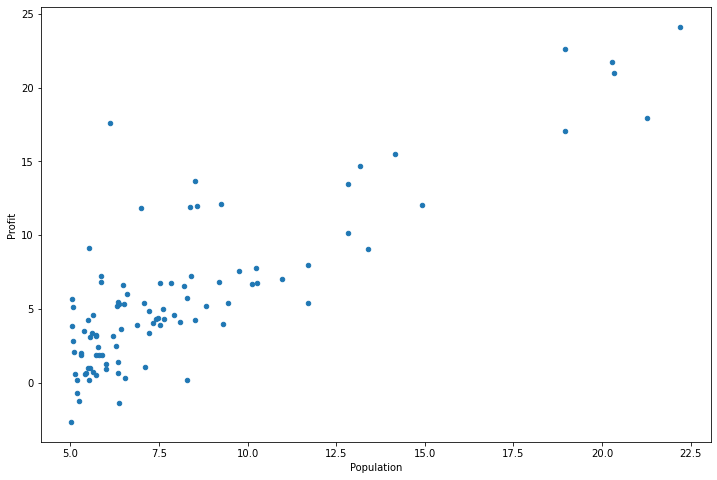

In [13]:
# Data Plotting for getting better idea

data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [17]:
#create a function to compute the cost of a given solution (characterized by the parameters theta)
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [21]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [22]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [23]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [24]:
#The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize theta.
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))



In [25]:
theta

matrix([[0, 0]])

In [26]:
#the shape of our matrices.

X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [27]:
# compute the cost for our initial solution (0 values for theta)

computeCost(X, y, theta)

32.072733877455676

In [28]:
# define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [29]:
# Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

alpha = 0.01
iters = 1000

In [30]:
#  run the gradient descent algorithm to fit our parameters theta to the training set

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [31]:
#  compute the cost (error) of the trained model using our fitted parameters

computeCost(X, y, g)

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

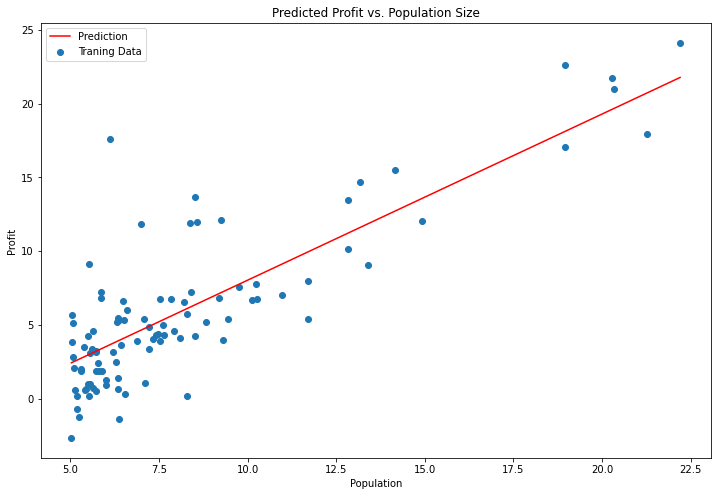

In [32]:
#  plot the linear model along with the data to visually see how well it fits.

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

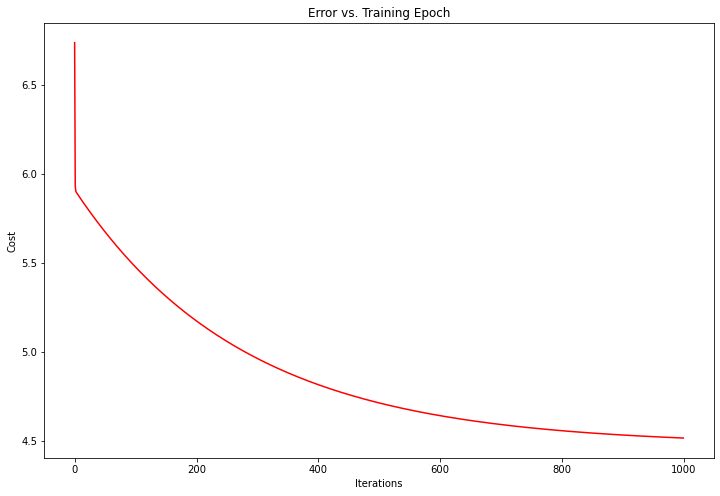

In [33]:
# example of a convex optimization problem.

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')